Libraries:

In [2]:
# Thêm các thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [3]:
# Lấy dữ liệu từ Data
url = "../../../Data/number_of_deaths_processed_data.csv"

# Đọc file 
deaths = pd.read_csv(url)
deaths

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101,Zambia,2021


***DỰ ĐOÁN TỔNG SỐ CA TỬ VONG TOÀN CẦU***

Chia ra label và feature
- Label: Injuries - số ca tử vong do chấn thương
- Features: các nguyên do khác

Lý do chia ra label và feature:

- Huấn luyện mô hình: Mô hình máy học cần học cách dự đoán một biến dự báo (label) dựa trên thông tin từ các biến khác (features). Bằng cách chia nhỏ dữ liệu thành label và features, mô hình có thể học cách liên kết giữa các features và label để tạo ra các dự đoán chính xác.

- Phân loại công việc: Bằng cách xác định label và features, xác định được nhiệm vụ của mô hình. Label là điều mà mô hình cố gắng dự đoán, trong khi features là thông tin mà mô hình sử dụng để thực hiện dự đoán.

- Tiền xử lý dữ liệu: Chia ra label và features giúp áp dụng các kỹ thuật tiền xử lý dữ liệu riêng biệt cho từng loại. 

- Đánh giá hiệu suất: Khi mô hình đã được huấn luyện, việc chia ra label và features cũng giúp đánh giá hiệu suất của mô hình bằng cách so sánh giữa label thực tế và label dự đoán được từ features.

In [4]:
# X là DataFrame chứa các features sau khi loại bỏ cột Injuries
X = deaths.drop(columns = 'Injuries')

# Y chứa label Injuries
Y = deaths['Injuries']

# Cột CountryName thường không thể dùng trực tiếp trong mô hình máy học do giá trị chuỗi 
# nên được mã hóa sang dạng số sử dụng LabelEncoder từ thư viện sklearn
LE = LabelEncoder()
X['CountryName'] = LE.fit_transform(X['CountryName'])

Tạo train, test set:

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 42)

Khởi tạo model

In [6]:
# Xác định mô hình hồi quy tuyến tính 
LR = LinearRegression()

# Huấn luyện mô hình với dữ liệu huấn luyện đã chia
LR.fit(X_train, Y_train)

LinearRegression()

Dự đoán khi dùng model

In [7]:
# Dự đoán số ca tử vong toàn cầu
total_deaths_pred = LR.predict(X_test)

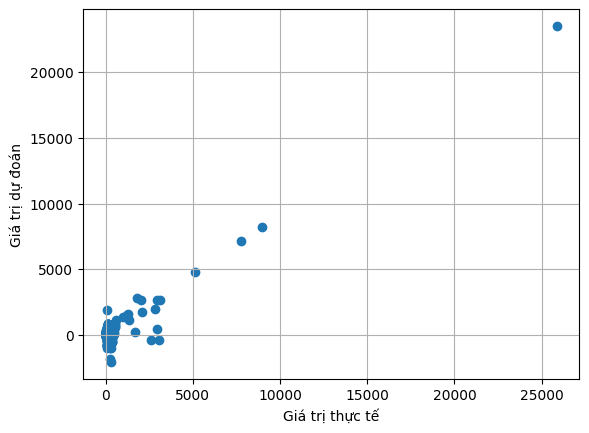

In [8]:
# Biểu đồ của số ca tử vong toàn cầu
plt.scatter(Y_test, total_deaths_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.grid(True)
plt.show()

Đánh giá:

In [9]:
# @title
MSE = mean_squared_error(Y_test, total_deaths_pred)
MSE


61785.42950305886

***DỰ ĐOÁN SỐ CA TỬ VONG CHO TỪNG NGUYÊN NHÂN TRONG NHÓM CÁC NGUYÊN NHÂN CHO HỆ SỐ TƯƠNG QUAN CAO***

In [10]:
cleaned_df = pd.read_csv("../../../Data/number_of_deaths_processed_data.csv")
df_copy = cleaned_df.copy()
df_copy = df_copy.drop(['Year', 'CountryName'], axis='columns')

In [11]:
# Tính ma trận tương quan
correlation_matrix = df_copy.corr()

Tìm các cặp tương quan

Ngưỡng tương quan là là ngưỡng mà tỉ lệ tử vong của các cặp tương quan cao hơn mức cố định( ở đây là 0.5)

In [29]:
# Thiết đặt ngưỡng tương quan
threshold = 0.5

In [31]:
# Liệt kê các cặp có tỷ lệ tương quan vượt ngưỡng
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
#print(high_correlation)
couple = {}

for col in high_correlation:
    correlated_cols = correlation_matrix.index[high_correlation[col]].tolist()
    if len(correlated_cols) > 0:
        couple[col] = correlated_cols

couple_df = pd.DataFrame([(key, value) for key, values in couple.items() for value in values],
                         columns=['Cột có tỷ lệ tương quan cao', 'Cột có mối tương quan'])

print(couple_df)

           Cột có tỷ lệ tương quan cao   
0                          Prematurity  \
1                          Prematurity   
2                          Prematurity   
3                          Prematurity   
4                          Prematurity   
..                                 ...   
75  Acute lower respiratory infections   
76  Acute lower respiratory infections   
77  Acute lower respiratory infections   
78  Acute lower respiratory infections   
79  Acute lower respiratory infections   

                                Cột có mối tương quan  
0                     Birth asphyxia and birth trauma  
1   Sepsis and other infectious conditions of the ...  
2                                Congenital anomalies  
3   Other Group 1 and Other noncommunicable (neona...  
4                                 Diarrhoeal diseases  
..                                                ...  
75  Other Group 1 and Other noncommunicable (neona...  
76                                           HI

Định nghĩa tỷ lệ số năm theo tỉ lệ 13:4:5

In [51]:
# Định nghĩa tỷ lệ số năm cho mỗi phần
total_years = 22
train_years = 13
val_years = 4
test_years = total_years - train_years - val_years

Xây dựng mô hình

Mô hình xây dựng dựa trên các cặp tương quan couple và sử dụng index các năm: train_index, val_index, test_index

In [52]:
total_predicted_values = 0
for target_col, feature_cols in couple.items():
    # Tạo DataFrame mới chỉ chứa các cột của cặp đã chọn
    selected_df = cleaned_df[[target_col] + feature_cols]

    # Chia dữ liệu thành features (X) và target (y)
    X_couple = selected_df[feature_cols]
    y_couple = selected_df[target_col]

    # Chia dữ liệu thành train,  và test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_couple, y_couple, test_size=test_years/total_years, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_years/total_years, random_state=42)
    
    # Khởi tạo và huấn luyện mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Dự đoán số ca tử vong trên tập validation
    predicted_values = model.predict(X_val)
    
    # Sử dụng cross-validation để xác thực siêu tham số
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Đánh giá hiệu suất mô hình
    mean_mse = -scores.mean()  # Mean Squared Error
    root_mean_mse = np.sqrt(mean_mse)  # Root Mean Squared Error

    # Báo cáo quy trình tinh chỉnh mô hình
    print(f"Độ lỗi bình phương trung bình: {mean_mse}")
    print(f"Căn bậc hai độ lỗi bình phương trung bình : {root_mean_mse}")
    
    # Dự đoán số ca tử vong trên tập test
    predicted_test = model.predict(X_test)

    # Đánh giá hiệu suất mô hình trên tập test
    test_score = model.score(X_test, y_test)
    
    # Tính tổng dự đoán từ tất cả các cặp
    total_predicted_values += sum(predicted_test)

Độ lỗi bình phương trung bình: 2555538.5339148906
Căn bậc hai độ lỗi bình phương trung bình : 1598.605183875897
Độ lỗi bình phương trung bình: 1092774.2084393024
Căn bậc hai độ lỗi bình phương trung bình : 1045.358411473932
Độ lỗi bình phương trung bình: 623543.464205395
Căn bậc hai độ lỗi bình phương trung bình : 789.6476835940158
Độ lỗi bình phương trung bình: 451391.7642889551
Căn bậc hai độ lỗi bình phương trung bình : 671.8569522517089
Độ lỗi bình phương trung bình: 526611.4570458098
Căn bậc hai độ lỗi bình phương trung bình : 725.6799963109152
Độ lỗi bình phương trung bình: 578206.6433137171
Căn bậc hai độ lỗi bình phương trung bình : 760.3990027043152
Độ lỗi bình phương trung bình: 764.2682268024523
Căn bậc hai độ lỗi bình phương trung bình : 27.645401548945756
Độ lỗi bình phương trung bình: 13487.654478790315
Căn bậc hai độ lỗi bình phương trung bình : 116.13636157031232
Độ lỗi bình phương trung bình: 22784.07087412133
Căn bậc hai độ lỗi bình phương trung bình : 150.94393288278

Nhìn vào các giá trị độ lỗi bình phương trung bình (MSE) và căn bậc hai của MSE (RMSE) của mô hình, có thể thấy sự chênh lệch lớn giữa chúng:

MSE và RMSE lớn: Đây là dấu hiệu của sự chênh lệch lớn giữa dự đoán của mô hình và giá trị thực tế. Điều này có thể cho thấy mô hình đang dự đoán không chính xác và không phản ánh đúng dữ liệu thực tế.

Chênh lệch lớn giữa các giá trị: Sự biến động lớn giữa các giá trị MSE và RMSE có thể cho thấy mô hình không ổn định hoặc không thể đưa ra dự đoán đáng tin cậy.

In [53]:
# In tổng số ca tử vong dự đoán
print("Tổng ca tử vong:")
print(total_predicted_values)

Tổng ca tử vong:
11255048.580130646


Vẽ biểu đồ

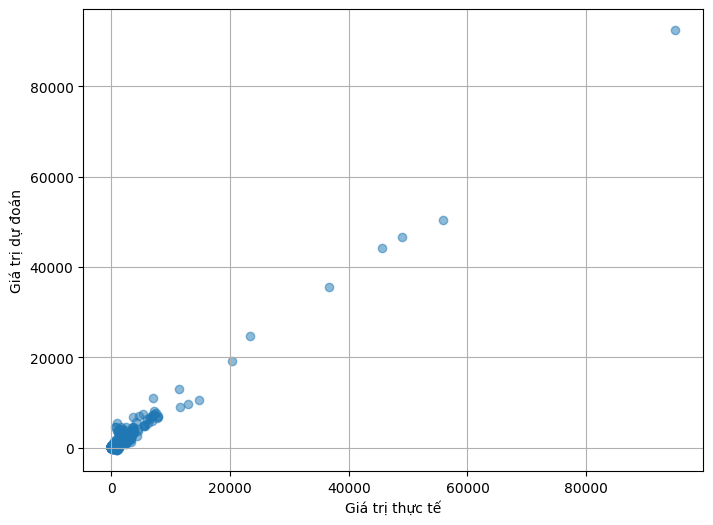

In [55]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_test, alpha=0.5)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.grid(True)
plt.show()